<a href="https://colab.research.google.com/github/Loomer/2022-itc303-team08/blob/ml-lachlan/Loading_Data_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!git clone -b ml-lachlan https://github.com/Loomer/2022-itc303-team08.git

Cloning into '2022-itc303-team08'...
remote: Enumerating objects: 323, done.
remote: Counting objects: 100% (10/10), done.
remote: Compressing objects: 100% (10/10), done.
remote: Total 323 (delta 3), reused 0 (delta 0), pack-reused 313
Receiving objects: 100% (323/323), 110.59 MiB | 38.17 MiB/s, done.
Resolving deltas: 100% (33/33), done.


In [6]:
import os
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential, Model
from keras.layers import (
    Dense, Conv2D, MaxPool2D, Dropout, Flatten, 
    BatchNormalization, GlobalAveragePooling2D
)

from keras.applications.densenet import DenseNet121
from keras import backend as K

from sklearn.metrics import confusion_matrix, classification_report

os.listdir("/content/2022-itc303-team08/images")

['train', 'test']

Train set:
COVID=100
NORMAL=100
Test set:
COVID = 5
NORMAL = 5


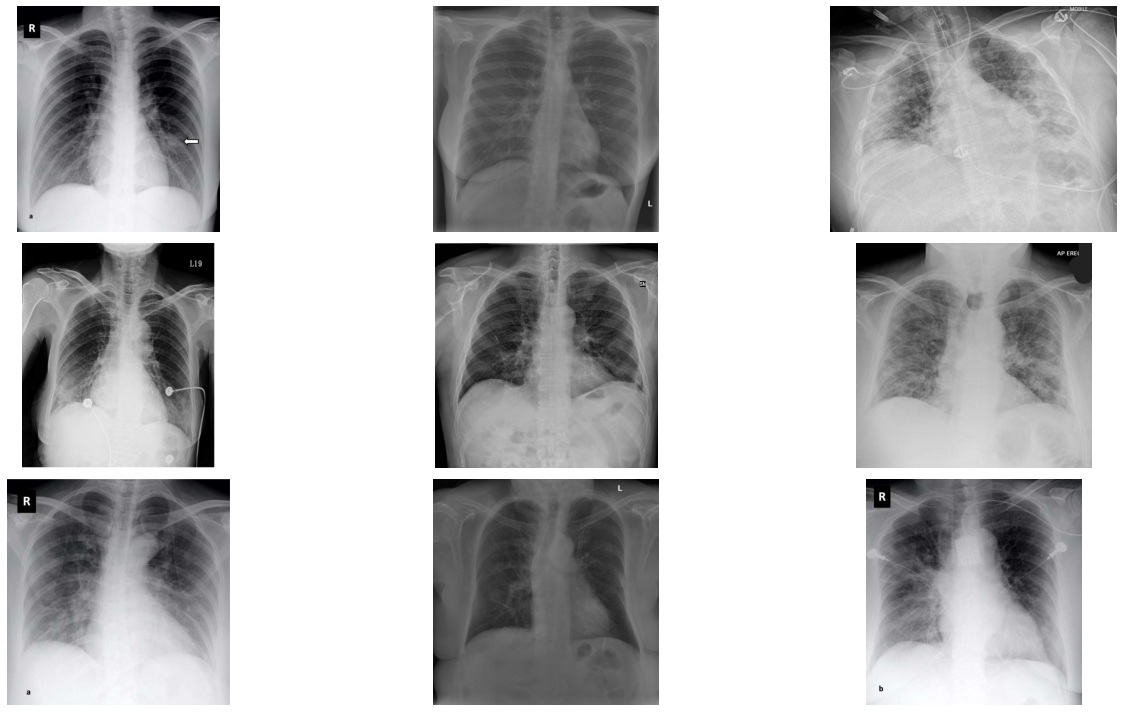

In [7]:
train_dir = "/content/2022-itc303-team08/images/train"
test_dir = "/content/2022-itc303-team08/images/test"

print("Train set:\n========================================")
num_covid = len(os.listdir(os.path.join(train_dir, 'COVID')))
num_normal = len(os.listdir(os.path.join(train_dir, 'NORMAL')))
print(f"COVID={num_covid}")
print(f"NORMAL={num_normal}")

print("Test set:\n========================================")
print(f"COVID = {len(os.listdir(os.path.join(test_dir, 'COVID')))}")
print(f"NORMAL = {len(os.listdir(os.path.join(test_dir, 'NORMAL')))}")

covid = os.listdir("/content/2022-itc303-team08/images/train/COVID")
covid_dir = "/content/2022-itc303-team08/images/train/COVID"

plt.figure(figsize=(20, 10))

for i in range(9):
    plt.subplot(3, 3, i + 1)
    img = plt.imread(os.path.join(covid_dir, covid[i]))
    plt.imshow(img, cmap='gray')
    plt.axis('off')
    
plt.tight_layout()

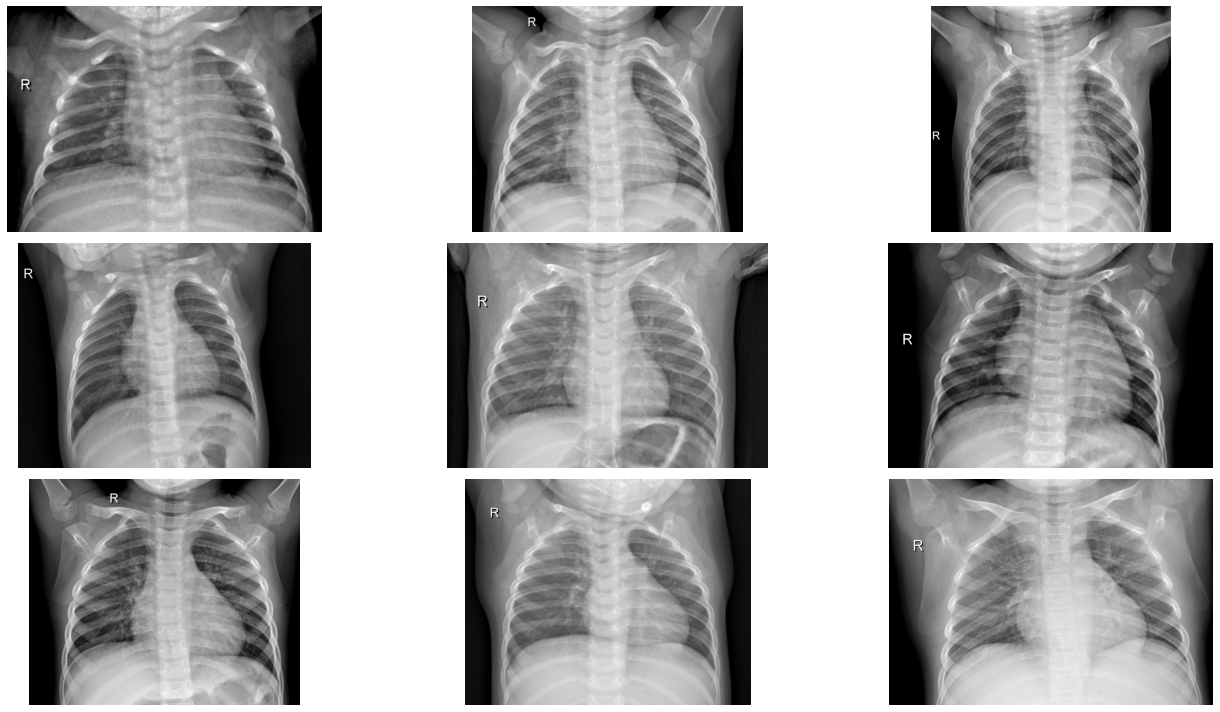

In [8]:
normal = os.listdir("/content/2022-itc303-team08/images/train/NORMAL")
normal_dir = "/content/2022-itc303-team08/images/train/NORMAL"

plt.figure(figsize=(20, 10))

for i in range(9):
    plt.subplot(3, 3, i + 1)
    img = plt.imread(os.path.join(normal_dir, normal[i]))
    plt.imshow(img, cmap='gray')
    plt.axis('off')
    
plt.tight_layout()

The dimensions of the image are 747 pixels width and 1040 pixels height, one single color channel.
The maximum pixel value is 255.0000 and the minimum is 0.0000
The mean value of the pixels is 117.3450 and the standard deviation is 54.3624


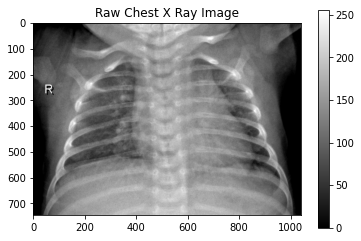

In [16]:
normal_img = os.listdir("/content/2022-itc303-team08/images/train/NORMAL")[0]
normal_dir = "/content/2022-itc303-team08/images/train/NORMAL"
sample_img_0 = plt.imread(os.path.join(normal_dir, normal_img))
plt.imshow(sample_img_0, cmap='gray')
plt.colorbar()
plt.title('Raw Chest X Ray Image')

print(f"The dimensions of the image are {sample_img_0.shape[0]} pixels width and {sample_img_0.shape[1]} pixels height, one single color channel.")
print(f"The maximum pixel value is {sample_img_0.max():.4f} and the minimum is {sample_img_0.min():.4f}")
print(f"The mean value of the pixels is {sample_img_0.mean():.4f} and the standard deviation is {sample_img_0.std():.4f}")

Text(-8.700000000000003, 0.5, '# Pixels in Image')

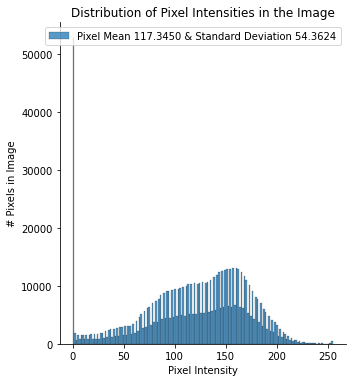

In [17]:
sns.displot(sample_img_0.ravel(),
             label=f"Pixel Mean {np.mean(sample_img_0):.4f} & Standard Deviation {np.std(sample_img_0):.4f}", 
             kde=False)
plt.legend(loc='upper right')
plt.title('Distribution of Pixel Intensities in the Image')
plt.xlabel('Pixel Intensity')
plt.ylabel('# Pixels in Image')

The dimensions of the image are 1330 pixels width and 1596 pixels height, one single color channel.
The maximum pixel value is 255.0000 and the minimum is 0.0000
The mean value of the pixels is 133.4893 and the standard deviation is 57.5524


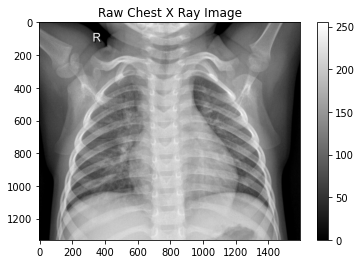

In [14]:
normal_img = os.listdir("/content/2022-itc303-team08/images/train/NORMAL")[1]
normal_dir = "/content/2022-itc303-team08/images/train/NORMAL"
sample_img = plt.imread(os.path.join(normal_dir, normal_img))
plt.imshow(sample_img, cmap='gray')
plt.colorbar()
plt.title('Raw Chest X Ray Image')

print(f"The dimensions of the image are {sample_img.shape[0]} pixels width and {sample_img.shape[1]} pixels height, one single color channel.")
print(f"The maximum pixel value is {sample_img.max():.4f} and the minimum is {sample_img.min():.4f}")
print(f"The mean value of the pixels is {sample_img.mean():.4f} and the standard deviation is {sample_img.std():.4f}")

Text(-8.700000000000003, 0.5, '# Pixels in Image')

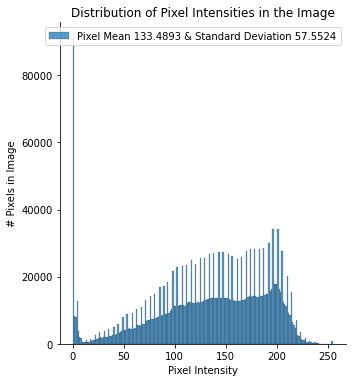

In [18]:
sns.displot(sample_img.ravel(),
             label=f"Pixel Mean {np.mean(sample_img):.4f} & Standard Deviation {np.std(sample_img):.4f}", 
             kde=False)
plt.legend(loc='upper right')
plt.title('Distribution of Pixel Intensities in the Image')
plt.xlabel('Pixel Intensity')
plt.ylabel('# Pixels in Image')

In [19]:
image_generator = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    samplewise_center=True,
    samplewise_std_normalization=True
)

In [22]:
train = image_generator.flow_from_directory(train_dir, 
                                            batch_size=8, 
                                            shuffle=True, 
                                            class_mode='binary',
                                            target_size=(400, 400))

test = image_generator.flow_from_directory(test_dir, 
                                            batch_size=1, 
                                            shuffle=False, 
                                            class_mode='binary',
                                            target_size=(400, 400))

Found 200 images belonging to 2 classes.
Found 10 images belonging to 2 classes.


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


The dimensions of the image are 400 pixels width and 400 pixels height, one single color channel.
The maximum pixel value is 2.3875 and the minimum is -2.7247
The mean value of the pixels is -0.0000 and the standard deviation is 1.0000


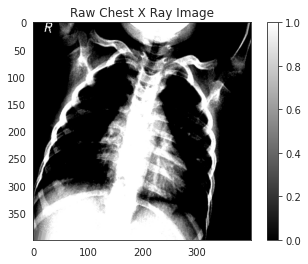

In [29]:
sns.set_style('white')
generated_image, label = train.__getitem__(0)
plt.imshow(generated_image[0], cmap='gray')
plt.colorbar()
plt.title('Raw Chest X Ray Image')

print(f"The dimensions of the image are {generated_image.shape[1]} pixels width and {generated_image.shape[2]} pixels height, one single color channel.")
print(f"The maximum pixel value is {generated_image.max():.4f} and the minimum is {generated_image.min():.4f}")
print(f"The mean value of the pixels is {generated_image.mean():.4f} and the standard deviation is {generated_image.std():.4f}")

Text(-8.700000000000003, 0.5, '# Pixels in Image')

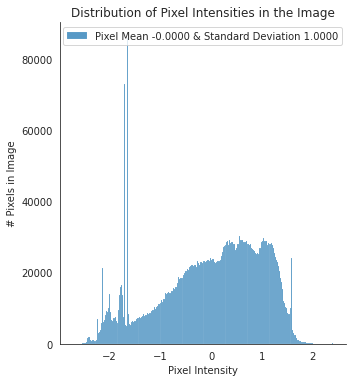

In [30]:
sns.displot(generated_image.ravel(),
             label=f"Pixel Mean {np.mean(generated_image):.4f} & Standard Deviation {np.std(generated_image):.4f}", 
             kde=False)
plt.legend(loc='upper center')
plt.title('Distribution of Pixel Intensities in the Image')
plt.xlabel('Pixel Intensity')
plt.ylabel('# Pixels in Image')

In [31]:
# Class weights

weight_for_1 = num_covid / (num_normal + num_covid)
weight_for_0 = num_normal / (num_normal + num_covid)

class_weight = {0: weight_for_0, 1: weight_for_1}

print(f"Weight for class 0: {weight_for_0:.2f}")
print(f"Weight for class 1: {weight_for_1:.2f}")

Weight for class 0: 0.50
Weight for class 1: 0.50


In [45]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(3, 3), input_shape=(400, 400, 3), activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(filters=32, kernel_size=(3, 3), input_shape=(400, 400, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', 
              optimizer='adam', 
              metrics=['accuracy'])

In [46]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_18 (Conv2D)          (None, 398, 398, 32)      896       
                                                                 
 batch_normalization_18 (Bat  (None, 398, 398, 32)     128       
 chNormalization)                                                
                                                                 
 conv2d_19 (Conv2D)          (None, 396, 396, 32)      9248      
                                                                 
 batch_normalization_19 (Bat  (None, 396, 396, 32)     128       
 chNormalization)                                                
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 198, 198, 32)     0         
 2D)                                                             
                                                      

In [48]:
r = model.fit(
    train, 
    epochs=10,
#    validation_data=validation, 
    class_weight=class_weight,
    steps_per_epoch=20,
    validation_steps=25,
)

Epoch 1/10
20/20 [==============================] - 183s 9s/step - loss: 8.0709 - accuracy: 0.8438
Epoch 2/10
20/20 [==============================] - 175s 9s/step - loss: 1.5378 - accuracy: 0.9563
Epoch 3/10
20/20 [==============================] - 173s 9s/step - loss: 1.9474 - accuracy: 0.9125
Epoch 4/10
20/20 [==============================] - 178s 9s/step - loss: 0.4265 - accuracy: 0.9500
Epoch 5/10
20/20 [==============================] - 175s 9s/step - loss: 0.8273 - accuracy: 0.9250
Epoch 6/10
20/20 [==============================] - 175s 9s/step - loss: 0.2900 - accuracy: 0.9812
Epoch 7/10
20/20 [==============================] - 179s 9s/step - loss: 0.5213 - accuracy: 0.9625
Epoch 8/10
20/20 [==============================] - 175s 9s/step - loss: 2.0959 - accuracy: 0.9500
Epoch 9/10
20/20 [==============================] - 176s 9s/step - loss: 1.1817 - accuracy: 0.9563
Epoch 10/10
20/20 [==============================] - 175s 9s/step - loss: 0.3626 - accuracy: 0.9625


Text(0.5, 1.0, 'Accuracy Evolution')

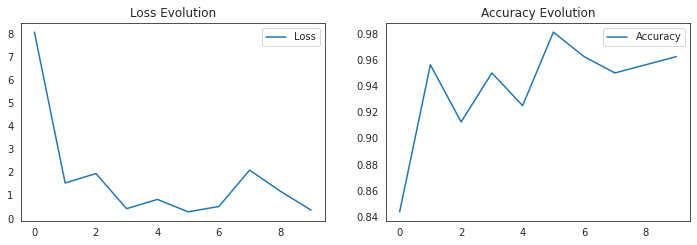

In [51]:
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.plot(r.history['loss'], label='Loss')
#plt.plot(r.history['val_loss'], label='Val_Loss')
plt.legend()
plt.title('Loss Evolution')

plt.subplot(2, 2, 2)
plt.plot(r.history['accuracy'], label='Accuracy')
#plt.plot(r.history['val_accuracy'], label='Val_Accuracy')
plt.legend()
plt.title('Accuracy Evolution')

In [52]:
evaluation = model.evaluate(test)
print(f"Test Accuracy: {evaluation[1] * 100:.2f}%")

evaluation = model.evaluate(train)
print(f"Train Accuracy: {evaluation[1] * 100:.2f}%")

10/10 [==============================] - 3s 303ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Test Accuracy: 100.00%
25/25 [==============================] - 55s 2s/step - loss: 3.1729 - accuracy: 0.9500
Train Accuracy: 95.00%


In [53]:
pred = model.predict(test)

print(confusion_matrix(test.classes, pred > 0.5))
pd.DataFrame(classification_report(test.classes, pred > 0.5, output_dict=True))

[[5 0]
 [0 5]]


,0,1,accuracy,macro avg,weighted avg
precision,1.0,1.0,1.0,1.0,1.0
recall,1.0,1.0,1.0,1.0,1.0
f1-score,1.0,1.0,1.0,1.0,1.0
support,5.0,5.0,1.0,10.0,10.0


DENSENET

In [57]:
base_model = DenseNet121(input_shape=(400, 400, 3), include_top=False, weights='imagenet', pooling='avg')

base_model.summary()

Model: "densenet121"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 400, 400, 3  0           []                               
                                )]                                                                
                                                                                                  
 zero_padding2d_4 (ZeroPadding2  (None, 406, 406, 3)  0          ['input_3[0][0]']                
 D)                                                                                               
                                                                                                  
 conv1/conv (Conv2D)            (None, 200, 200, 64  9408        ['zero_padding2d_4[0][0]']       
                                )                                                       

In [58]:
layers = base_model.layers
print(f"The model has {len(layers)} layers")

print(f"The input shape {base_model.input}")
print(f"The output shape {base_model.output}")

The model has 428 layers
The input shape KerasTensor(type_spec=TensorSpec(shape=(None, 400, 400, 3), dtype=tf.float32, name='input_3'), name='input_3', description="created by layer 'input_3'")
The output shape KerasTensor(type_spec=TensorSpec(shape=(None, 1024), dtype=tf.float32, name=None), name='avg_pool/Mean:0', description="created by layer 'avg_pool'")


In [61]:
# model = Sequential()
base_model = DenseNet121(include_top=False, weights='imagenet')
x = base_model.output

x = GlobalAveragePooling2D()(x)

predictions = Dense(1, activation="sigmoid")(x)

model = Model(inputs=base_model.input, outputs=predictions)
# model.add(base_model)
# model.add(GlobalAveragePooling2D())
# model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', 
              optimizer='adam', 
              metrics=['accuracy'])

r = model.fit(
    train, 
    epochs=5,
#    validation_data=validation,
    class_weight=class_weight,
    steps_per_epoch=40,
    validation_steps=20,
)

Epoch 1/5
40/40 [==============================] - 427s 10s/step - loss: 0.1351 - accuracy: 0.8900


In [ ]:
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.plot(r.history['loss'], label='Loss')
plt.plot(r.history['val_loss'], label='Val_Loss')
plt.legend()
plt.title('Loss Evolution')

plt.subplot(2, 2, 2)
plt.plot(r.history['accuracy'], label='Accuracy')
plt.plot(r.history['val_accuracy'], label='Val_Accuracy')
plt.legend()
plt.title('Accuracy Evolution')

In [ ]:
evaluation = model.evaluate(test)
print(f"Test Accuracy: {evaluation[1] * 100:.2f}%")

evaluation = model.evaluate(train)
print(f"Train Accuracy: {evaluation[1] * 100:.2f}%")

In [ ]:
predicted_vals = model.predict(test, steps=len(test))

print(confusion_matrix(test.classes, predicted_vals > 0.5))
pd.DataFrame(classification_report(test.classes, predicted_vals > 0.5, output_dict=True))

In [ ]:
print(confusion_matrix(test.classes, predicted_vals > 0.7))
pd.DataFrame(classification_report(test.classes, predicted_vals > 0.7, output_dict=True))